# WEEK2: Resampling Methods

# Objective

This homework sheet will help reviewing the basic concepts associated with model selection and regularization. Please review the lectures, suggested readings, and additional resources _before_ getting started on the HW.

**Some questions in this assignment will require you to conduct independent research beyond the material covered in the recorded content.**

**Questions**

 This homework is divided into two main parts. First, a conceptual component will review the basic concepts related to resampling. The second part of the homework is mostly intended to be a brief introduction to regularization methods and resampling in python . Several of these questions are modified from James et al. (2021).

Marks Distribution

| Question      | Marks |
| ----------- | ----------- |
| Q1a    | 1     |
| Q1b    | 0.50      |
| Q1c   | 1      |
| Q1d     | 0.50      |
| Q1e     | 0.50     |
| Q1f    | 0.50    |
| Q2a    | 1     |
| Q2b    | 1      |
| Q2c   | 1      |
| Q2d     | 1      |
| Q3a   | 1    |
| Q3b     | 1      |
| Q4     | 1      |
| Q5a    | 1    |
| Q5b    | 1     |
| Q5c   | 1     |
| Q5d     | 1      |

# Conceptual

##  Q1. We will derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of `n` observations. **Please note that samples are obtained with replacement**.

### a) What is the probability that the first bootstrap observation is not the $jth$ observation from the original sample? Justify your answer.

**Probability of Not Being Selected:** 

In each draw (with replacement), any observation has an equal chance $(1/n)$ of not being selected.


**Multiple Draws:** 

To be excluded from the entire bootstrap sample when we are allowing replacement, an observation needs to be not selected in all n draws.

**Probability of Exclusion:**

The probability of an observation being excluded from the bootstrap sample is the product of the probability of not being selected in each individual draw. Therefore, the probability of exclusion is $(1 - 1/n)^n$.

**Complementary Probability:** 

The probability (P) of a given observation being included in the bootstrap sample is the complement of the probability of exclusion.

Therefore, the probability (P) of a given observation being part of a bootstrap sample is:


P = 1 - $(1 - 1/n)^n$




### b) What is the probability that the second bootstrap observation is not the $jth$ observation from the original sample?



he probability that the second bootstrap observation is not the jth observation from the original sample is also $1 - 1/n$, where n is the number of observations in the original sample.we need to consider that each observation has an equal probability of being selected in each draw of the bootstrap sample. Since samples are obtained with replacement.


###  c) Argue that the probability that the $jth$ observation is not in the bootstrap sample is $(1 − 1/n)^n$.

**Independence of Draws:** 

In bootstrap sampling, each observation is selected independently with replacement. Therefore, the probability of not selecting the `jth` observation in one draw is $1-(1/n)$.

**Repeated Draws:** 

Since there are n observations and each observation is selected independently with replacement, the probability of not selecting the jth observation in any of the n draws is $(1-1/n)^n$.

**Combination of Events:**

The event of not selecting the jth observation in each draw can be seen as a sequence of n independent events, `each` with a probability of $1-(1/n)$.
therefore for n events it would be $(1-1/n)^n$.

###  d) When `n = 5`, what is the probability that the $jth$ observation is in the bootstrap sample?

In [1]:
# Writing general purpose code to calculate the probability 

def calculate_probability(n):
    return 1-(1-(1/n))**n

In [2]:
calculate_probability(5)

0.6723199999999999

Probability is 0.6723199999999999 or 67.232%

### e) When `n = 100`, what is the probability that the $jth$ observation is in the bootstrap sample?

In [3]:
calculate_probability(100)

0.6339676587267709

Probability would be  0.6339676587267709 or 63.397%

### f) When `n = 1000`, what is the probability that the $jth$ observation is in the bootstrap sample?


In [4]:
calculate_probability(1000)

0.6323045752290363

Probability would be  0.63230457 or 63.230457%


## Q2)
The following questions are relative to k-fold cross-validation.

### a) Explain how k-fold cross-validation is implemented.


In k-fold cross-validation, the dataset is divided into k equal-sized subsets, also known as folds. The cross-validation process is then repeated k times. In each iteration:

1. One of the k subsets is held out as the validation set.
2. The model is trained on the remaining  k - 1 subsets, which are used as the training set.
3. The performance of the model is evaluated on the validation set, typically using a performance metric such as accuracy, mean squared error, or area under the curve.
4. Steps 1-3 are repeated  k times, with each of the k subsets used exactly once as the validation set.
5. The final performance metric is typically computed as the average of the performance metrics obtained in each iteration.

This process allows us to assess how well the model generalizes to new data and helps to detect issues such as over-fitting or under-fitting. By repeating the process k times and averaging the results, we obtain a more robust estimate of the model's performance compared to a single train-test split. Additionally, each data point is used for validation exactly once, which helps in maximizing the use of available data for both training and validation.

### b) How would you choose the analyzed k? Does that matter?

The choice of ( k ) in ( k )-fold cross-validation is crucial and can have an impact on the performance estimation and computational complexity of the process. Here are some considerations for choosing the value of ( k ):

1. **Size of the Dataset**: If the dataset is relatively small, using a larger value of ( k ) might lead to more stable and reliable performance estimates. However, larger values of ( k ) will also result in higher computational overhead.

2. **Computational Resources**: As the value of ( k ) increases, the computational cost of cross-validation also increases proportionally. Therefore, it's important to consider the available computational resources when choosing the value of ( k ).

3. **Trade-off between Bias and Variance**: Lower values of ( k ) (e.g., ( k = 5 ) or ( k = 10 )) tend to have higher bias but lower variance in the estimated performance metrics. Conversely, higher values of ( k ) (e.g., ( k = 100 )) tend to have lower bias but higher variance. The choice depends on whether bias or variance is more critical for the specific application.

4. **Cross-Validation Stability**: It's important to ensure that the performance estimates obtained from cross-validation are stable and not overly sensitive to the choice of ( k ). 

5. **Computational Efficiency**: For very large datasets, using a smaller value of ( k ) may be more practical due to computational constraints.

In practice, common choices for ( k ) include ( k = 5 ), ( k = 10 ), and ( k = 20 ). However, the optimal choice may vary depending on the specific characteristics of the dataset and the objectives of the analysis. It's often recommended to perform experiments with different values of ( k ) and evaluate the performance to determine the most suitable value for a particular application.

### c) What are the advantages and disadvantages of k-fold cross-validation relative to: *The validation set* approach?


**Advantages of k-fold cross-validation relative to the validation set approach:**

1. **Better Utilization of Data**: In k-fold cross-validation, each data point is used for both training and validation exactly once, leading to better utilization of the available data compared to the validation set approach where a fixed portion of data is reserved for validation.

2. **More Reliable Performance Estimation**: k-fold cross-validation provides a more reliable estimate of model performance by averaging the results from multiple iterations, reducing the variability in performance estimates compared to a single validation set.

3. **Reduced Variance in Performance Estimate**: By averaging performance metrics across multiple folds, k-fold cross-validation tends to produce performance estimates with lower variance compared to the validation set approach, especially when the dataset is relatively small.

4. **Less Sensitivity to Data Split**: The performance estimate obtained through k-fold cross-validation is less sensitive to the particular random split of data compared to the validation set approach, which can be influenced by the choice of which observations are included in the validation set.

**Disadvantages of k-fold cross-validation relative to the validation set approach:**

1. **Higher Computational Cost**: k-fold cross-validation requires training and evaluating the model multiple times, leading to higher computational cost compared to the validation set approach, especially when the dataset or model is large.

2. **Slower Model Evaluation**: Due to the repetitive nature of training and evaluation in k-fold cross-validation, the process can be slower compared to the validation set approach, which involves training the model only once.

3. **Potential Overfitting**: In k-fold cross-validation, the model may be trained multiple times on different subsets of data, increasing the risk of overfitting compared to the validation set approach, where the model is trained only once on a larger portion of the data.

4. **Complexity in Implementation**: Implementing k-fold cross-validation requires additional code to partition the data, train the model, and aggregate the performance metrics across folds, adding complexity compared to the simpler validation set approach.

Overall, while k-fold cross-validation provides more reliable performance estimates and better data utilization, it comes with higher computational cost and complexity in implementation compared to the validation set approach. The choice between the two methods depends on factors such as dataset size, computational resources, and the desired level of performance estimation reliability.

### d)  What are the advantages and disadvantages of k-fold cross-validation relative to: *LOOCV*?

**Advantages of k-fold cross-validation relative to Leave-One-Out Cross-Validation (LOOCV):**

1. **Computational Efficiency**: k-fold cross-validation is computationally more efficient compared to LOOCV, especially for large datasets, as it involves partitioning the data into k folds and repeating the training process k times, whereas LOOCV trains the model n times, where n is the number of observations.

2. **Less Bias**: k-fold cross-validation tends to have lower bias compared to LOOCV, especially in cases where the dataset is small, as it averages the results over multiple iterations, whereas LOOCV can be biased due to the reliance on a single omitted observation in each iteration.

3. **Robustness to Outliers**: k-fold cross-validation is less sensitive to outliers compared to LOOCV since outliers have a smaller impact on the average performance estimate across k folds compared to LOOCV, where each observation is treated as a separate validation set.

4. **Consistent Performance Estimate**: k-fold cross-validation provides a more consistent performance estimate across different runs compared to LOOCV, as the variability in the performance estimate is reduced by averaging results over multiple folds.

**Disadvantages of k-fold cross-validation relative to LOOCV:**

1. **Higher Variance**: k-fold cross-validation tends to have higher variance in the performance estimate compared to LOOCV, especially when the dataset is small, as it relies on a random partitioning of the data into folds, which may lead to variability in the estimated performance metrics.

2. **Less Precision**: Due to the smaller training sets in each fold, k-fold cross-validation may result in less precise estimates of the model's performance compared to LOOCV, where each model is trained on almost the entire dataset except for one observation.

3. **Potential Overfitting**: In some cases, k-fold cross-validation may be more prone to overfitting compared to LOOCV, especially when the dataset is small and the model is complex, as the model is trained multiple times on different subsets of data, increasing the risk of overfitting.

4. **Less Sensitivity to Model Variance**: LOOCV is more sensitive to variance in the model's performance estimate compared to k-fold cross-validation, as it evaluates the model's performance on each individual observation separately, making it more susceptible to noise and model variance.

Overall, the choice between k-fold cross-validation and LOOCV depends on factors such as dataset size, computational resources, and the desired balance between bias and variance in the performance estimate. While k-fold cross-validation offers computational efficiency and reduced bias, LOOCV provides lower variance and potentially more precise performance estimates, especially for small datasets.

# Applied

We have to use college dataset to answer the questions given in the notebook

## Q3)

### a) What is the following code supposed to do?

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Define constants
N = 100
ORDER = 2
N_FOLDS = 20
POLY_DEGREE = np.arange(1, 11)
N_REPLICATES = 10

# Set random seed for reproducibility
np.random.seed(123)

# Generate simulated data
x = np.random.uniform(low=-4, high=4, size=N)
y = np.random.normal(loc=x**ORDER, scale=0.25, size=N)
data = pd.DataFrame({'x': x, 'y': y})

# Run multiple replicates and average the MSE estimates
mse_estimates = np.zeros((N_REPLICATES, len(POLY_DEGREE)))
for r in range(N_REPLICATES):
    kf = KFold(n_splits=N_FOLDS, shuffle=True)
    indices = [(train_index, test_index) for train_index, test_index in kf.split(data)]
    for q_idx, q in enumerate(POLY_DEGREE):
        y_hat = np.zeros(N)
        for train_index, test_index in indices:
            # Fit on K-1 folds
            x_train, y_train = data.iloc[train_index]['x'], data.iloc[train_index]['y']
            x_train = np.array(x_train).reshape(-1, 1)  # Convert to NumPy array and reshape
            poly = PolynomialFeatures(degree=q)
            x_train_poly = poly.fit_transform(x_train)
            lin_reg = LinearRegression()
            lin_reg.fit(x_train_poly, y_train)

            # Predict on the kth fold
            x_test = np.array(data.iloc[test_index]['x']).reshape(-1, 1)  # Convert to NumPy array and reshape
            x_test_poly = poly.fit_transform(x_test)
            y_hat[test_index] = lin_reg.predict(x_test_poly)

        # Get the MSE estimate
        mse_estimate = np.mean((y_hat - data['y'])**2)
        mse_estimates[r, q_idx] = mse_estimate

# Average the MSE estimates across replicates
mse_mean = np.mean(mse_estimates, axis=0)
mse_std = np.std(mse_estimates, axis=0)


### Note: The code given wasn't working as to reshape we need to have the np array to reshape, it's been fixed now.
1. Simulated data: Generates synthetic data points (`x` and `y`) using NumPy's random functions. The `y` values are generated based on a polynomial relationship with the `x` values, with added noise.

2. K-fold cross-validation: Utilizes scikit-learn's `KFold` class to split the data into `N_FOLDS` folds for cross-validation.

3. Polynomial regression: Fits polynomial regression models of varying degrees (`POLY_DEGREE`) to the data using linear regression from scikit-learn.

4. Model evaluation: Evaluates the performance of each polynomial regression model using mean squared error (MSE).

5. Replicates: The process is repeated multiple times (`N_REPLICATES`) to obtain more robust estimates of the MSE for each polynomial degree.

6. Analysis: Computes the mean and standard deviation of the MSE estimates across replicates for each polynomial degree.

Overall, the code performs k-fold cross-validation to assess the performance of polynomial regression models of different degrees on simulated data, providing insights into the model's ability to capture the underlying relationship between the features (`x`) and the target (`y`).

 ### b) To the best of your knowledge, improve the structure, content, clarity, and reproducibility of the code presented before in "part a" of this question (e.g. would you run a single or multiple replicates?). Fix any mistakes (if you find any). Finally, generate at least two plots summarizing your findings regarding the best-fitting polynomial order on the simulated dataset (also from "part a"): (1) MSE vs polynomial order, and (2) x vs y, along with a plot of the selected model.

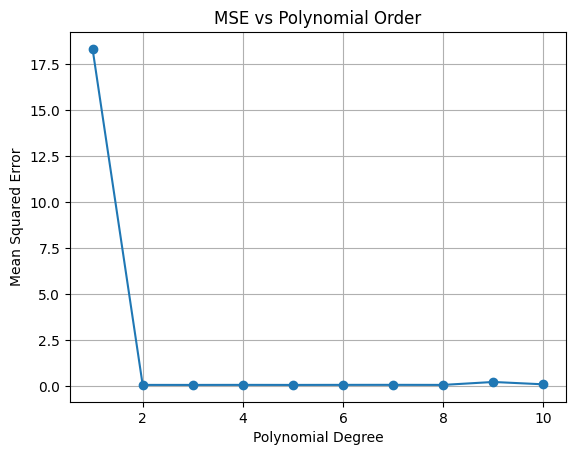

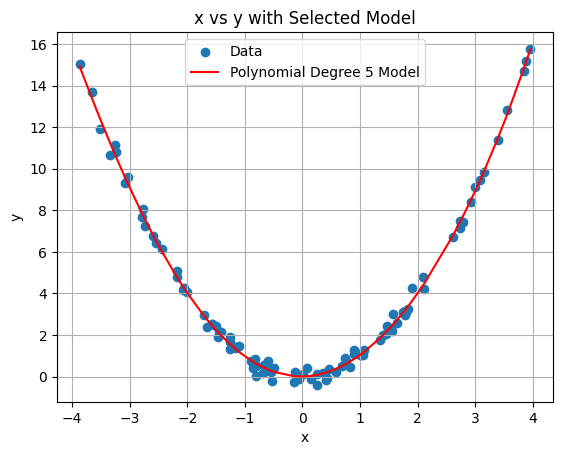

In [6]:
# BEGIN SOLUTION
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

def generate_data(n, order=2):
    np.random.seed(123)
    x = np.random.uniform(low=-4, high=4, size=n)
    y = np.random.normal(loc=x**order, scale=0.25, size=n)
    return pd.DataFrame({'x': x, 'y': y})

def run_cross_validation(data, poly_degrees, n_folds=5):
    mse_estimates = []
    for degree in poly_degrees:
        mse_degree = []
        kf = KFold(n_splits=n_folds, shuffle=True)
        for train_index, test_index in kf.split(data):
            x_train, x_test = data.iloc[train_index]['x'], data.iloc[test_index]['x']
            y_train, y_test = data.iloc[train_index]['y'], data.iloc[test_index]['y']
            mse = fit_and_evaluate_model(x_train, y_train, x_test, y_test, degree)
            mse_degree.append(mse)
        mse_estimates.append(np.mean(mse_degree))
    return mse_estimates

def fit_and_evaluate_model(x_train, y_train, x_test, y_test, degree):
    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train.values.reshape(-1, 1))
    x_test_poly = poly.transform(x_test.values.reshape(-1, 1))
    lin_reg = LinearRegression()
    lin_reg.fit(x_train_poly, y_train)
    y_pred = lin_reg.predict(x_test_poly)
    mse = np.mean((y_pred - y_test)**2)
    return mse

def plot_mse_vs_degree(poly_degrees, mse_estimates):
    plt.plot(poly_degrees, mse_estimates, marker='o')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('Mean Squared Error')
    plt.title('MSE vs Polynomial Order')
    plt.grid(True)
    plt.show()

def plot_data_and_model(x, y, x_sorted, y_pred_sorted, degree):
    plt.scatter(x, y, label='Data')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('x vs y with Selected Model')
    plt.plot(x_sorted, y_pred_sorted, color='red', label=f'Polynomial Degree {degree} Model')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define constants
N = 100  # Number of observations
POLY_DEGREE = np.arange(1, 11)  # Polynomial degrees to test

# Generate simulated data
data = generate_data(N)

# Run cross-validation
mse_estimates = run_cross_validation(data, POLY_DEGREE)

# Plot MSE vs polynomial degree
plot_mse_vs_degree(POLY_DEGREE, mse_estimates)

# Fit the model with the best polynomial degree
best_degree = POLY_DEGREE[np.argmin(mse_estimates)]
x = data['x']
y = data['y']
x_sorted = np.sort(x)
poly = PolynomialFeatures(degree=best_degree)
x_poly = poly.fit_transform(x.values.reshape(-1, 1))
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
y_pred_sorted = lin_reg.predict(poly.transform(x_sorted.reshape(-1, 1)))

# Plot x vs y and the selected model
plot_data_and_model(x, y, x_sorted, y_pred_sorted, best_degree)

# END SOLUTION

## Q4) Bootstrap the following dataset (`n = 1000`) to obtain median and 95% CI (Confidence interval)for parameter estimates (slope and intercept) summarizing the relationship between `x` and `y_measured.` What happens with median parameter estimates when you examine `y` instead?

In [7]:
import numpy as np
from numpy.random import default_rng
import scipy.stats as stats

# Set seed for reproducibility
np.random.seed(1)

# Define the data
rng = default_rng(seed=1)
nobs = 1000
x = rng.normal(size=nobs)
y = x - 2 * x**2
y_measured = y + rng.normal(size=nobs)

def linear_regression(data):
    x, y = data[:, 0], data[:, 1]
    slope, intercept, _, _, _ = stats.linregress(x, y)
    return slope, intercept

def bootstrap(data, func, n_bootstrap=1000, ci_level=0.95):
    parameter_estimates = []
    n = len(data)
    for _ in range(n_bootstrap):
        resampled_indices = np.random.choice(range(n), size=n, replace=True)
        resampled_data = data[resampled_indices]
        parameter_estimates.append(func(resampled_data))
    parameter_estimates = np.array(parameter_estimates)
    median = np.median(parameter_estimates, axis=0)
    ci_lower = np.percentile(parameter_estimates, (1 - ci_level) / 2 * 100, axis=0)
    ci_upper = np.percentile(parameter_estimates, (1 + ci_level) / 2 * 100, axis=0)
    return median, ci_lower, ci_upper

# Bootstrap for y_measured
median_y_measured, ci_lower_y_measured, ci_upper_y_measured = bootstrap(
    np.column_stack((x, y_measured)), linear_regression)

# Bootstrap for y
median_y, ci_lower_y, ci_upper_y = bootstrap(
    np.column_stack((x, y)), linear_regression)

print("Bootstrap results for y_measured:")
print("Slope: Median =", median_y_measured[0], "95% CI =", ci_lower_y_measured[0], "-", ci_upper_y_measured[0])
print("Intercept: Median =", median_y_measured[1], "95% CI =", ci_lower_y_measured[1], "-", ci_upper_y_measured[1])

print("\nBootstrap results for y:")
print("Slope: Median =", median_y[0], "95% CI =", ci_lower_y[0], "-", ci_upper_y[0])
print("Intercept: Median =", median_y[1], "95% CI =", ci_lower_y[1], "-", ci_upper_y[1])


Bootstrap results for y_measured:
Slope: Median = 1.255525759029754 95% CI = 0.8163908486871553 - 1.664286256290293
Intercept: Median = -1.907593872789863 95% CI = -2.109979303915565 - -1.7080947643912416

Bootstrap results for y:
Slope: Median = 1.1914860815539305 95% CI = 0.7819823800716428 - 1.639859324463686
Intercept: Median = -1.9313505661860504 95% CI = -2.119815802464903 - -1.7594567019849474


Provide your answer in this Markdown cell

## Q5) We will predict the number of applications received using the other variables in the **College dataset.** Please load the relevant dataset first.


**Importing Libraries:**

In [8]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

**Loading dataset:**

In [9]:
#READ college.csv DATASET
df = pd.read_csv('college.csv')



In [10]:
le = LabelEncoder()

df['private_encoded'] = le.fit_transform(df['private'])
X = df.drop(columns=['private'])
y = df['private_encoded'] 

### a) Split the data set into a training set and a test set.

In [11]:
# BEGIN SOLUTION
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)
# END SOLUTION

Training set shape: (621, 18) (621,)
Test set shape: (156, 18) (156,)


### b) Fit a linear model using least squares on the training set, and report the test error obtained.
Link to linear model: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [12]:
#BEGIN SOLUTION
# Initialize the linear regression model
linear_model = LinearRegression()

# Fit the model on the training set
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Calculate the mean squared error (test error)
test_error = mean_squared_error(y_test, y_pred)

# Report the test error
print("Test Error (Mean Squared Error):", test_error)
# END SOLUTION

Test Error (Mean Squared Error): 3.852908775340713e-29


### c) Fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained.

Link to ridge regresion : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [13]:
#BEGIN SOLUTION
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

ridge_model = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

test_error = mean_squared_error(y_test, y_pred)
print("Test Error (Mean Squared Error):", test_error)
# END SOLUTION

Test Error (Mean Squared Error): 4.2119896676568384e-07


### d) Fit a lasso model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates.
 Link to lasso :https://scikit-learn.org/0.15/modules/generated/sklearn.linear_model.Lasso.html

In [14]:
#BEGIN SOLUTION
from sklearn.linear_model import LassoCV

lasso_model = LassoCV(alphas=[0.1, 1.0, 10.0], cv=5)

lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

test_error = mean_squared_error(y_test, y_pred)

print("Test Error (Mean Squared Error):", test_error)

non_zero_coef = np.sum(lasso_model.coef_ != 0)
print("Number of non-zero coefficient estimates:", non_zero_coef)
# END SOLUTION

Test Error (Mean Squared Error): 0.08233922956158084
Number of non-zero coefficient estimates: 16
